> Part 3
- In the first cell of your notebook, import the required packages with their customary aliases

In [84]:
# Import python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

> Part 4
- The original csv had two rows attached to the bottom that contained an index.
- The csv() call was modified by passing "skipfooter_2" to correct this issue. 
- The original csv file was not modified.

In [85]:
#Drop last two cells to remove index at bottom.
gdp_df = pd.read_csv('../data/Undata.csv', 
    skipfooter=2, engine='python')
print(gdp_df)

     Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2019  2065.036398              NaN
1        Afghanistan  2018  2033.779002              NaN
2        Afghanistan  2017  2058.383832              NaN
3        Afghanistan  2016  2057.062164              NaN
4        Afghanistan  2015  2068.265904              NaN
...              ...   ...          ...              ...
6863        Zimbabwe  1994  3263.934978              NaN
6864        Zimbabwe  1993  3033.504852              NaN
6865        Zimbabwe  1992  3054.889178              NaN
6866        Zimbabwe  1991  3426.598094              NaN
6867        Zimbabwe  1990  3324.348171              NaN

[6868 rows x 4 columns]


>  Part 5
- Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'


In [86]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']
print(gdp_df.head(n=1))

       Country  Year  GDP_Per_Capita
0  Afghanistan  2019     2065.036398


> Part 6
- How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.
    - There are 3 columns and 6868 rows. 
    - Dataypes are #0 - Object, #2 - int64, #3 - float64.
    - I don't think there is anything wrong with Dypes.

In [87]:
print(gdp_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   int64  
 2   GDP_Per_Capita  6868 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.1+ KB
None


> Part 7 
- Which years are represented in this dataset? 
    - The years 1990 - 2017 are represented in the dataset.
- Take a look at the number of observations per year. What do you notice?
    - The number of observations per year seems to trend upward.

In [88]:
gdp_df["Year"].value_counts()

2017    238
2016    238
2015    238
2014    238
2013    238
2012    237
2011    237
2018    237
2010    236
2009    236
2008    235
2007    235
2006    235
2005    234
2004    234
2003    233
2002    233
2001    232
2000    231
2019    231
1999    224
1998    223
1997    223
1996    221
1995    221
1994    214
1993    212
1992    209
1991    208
1990    207
Name: Year, dtype: int64

>  Part 8 
- How many countries are represented in this dataset?
    - There are 238 countries represented in the dataset.
- Which countries are least represented in the dataset?
    - Djibouti, Turks and Caicos Islands, Sint Maarten (Dutch part), Cayman Islands, and Nauru
- Why do you think these countries have so few observations?
    - Perhaps they have not been members of the UN as long as others.

In [89]:
gdp_df['Country'].value_counts()

Lebanon                      30
Middle income                30
Morocco                      30
Mozambique                   30
Myanmar                      30
                             ..
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country, Length: 238, dtype: int64

> Part 9
- Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.

In [90]:
gdp_2014 = gdp_df.loc[gdp_df['Year'] == 2014]
print(gdp_2014)

                  Country  Year  GDP_Per_Capita
5             Afghanistan  2014     2102.385234
23                Albania  2014    11623.866679
53                Algeria  2014    11512.705405
83                 Angola  2014     8239.828837
113   Antigua and Barbuda  2014    18104.241470
...                   ...   ...             ...
6727              Vietnam  2014     6098.489609
6757   West Bank and Gaza  2014     5967.073437
6783                World  2014    15189.648507
6813               Zambia  2014     3450.046561
6843             Zimbabwe  2014     2955.240287

[238 rows x 3 columns]


> Part 10
- Use `.describe()` to find the summary statistics for GDP per capita in 2014. 

In [91]:
gdp_2014["GDP_Per_Capita"].describe([])

count       238.000000
mean      19766.710348
std       20983.869623
min         822.610458
50%       12209.385755
max      156514.133850
Name: GDP_Per_Capita, dtype: float64

> Part 11
- Create a histogram of GDP Per Capita numbers for 2014 
- How would you describe the shape of the distribution?
    - The distribution appears to be skewed to the right

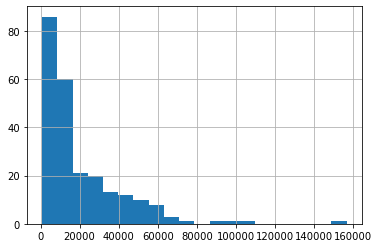

In [92]:
gdp_2014["GDP_Per_Capita"].hist(bins=20)
plt.show()

> Part 12 
- For GDP per capita in 2014 find:
- Top 5 counties
    - Macao SAR, China, Luxembourg, Qatar, Singapore, Bermuda
- Bottom 5 countries
    - Niger, Dem. Rep. Congo, Malawi, Burundi, Central African Republic

In [93]:
print(gdp_2014.sort_values('GDP_Per_Capita', ascending=False))

                       Country  Year  GDP_Per_Capita
3721          Macao SAR, China  2014   156514.133850
3691                Luxembourg  2014   108760.916030
5138                     Qatar  2014    95578.416973
5464                 Singapore  2014    87808.663157
561                    Bermuda  2014    77361.104881
...                        ...   ...             ...
4528                     Niger  2014     1127.615541
1422           Dem. Rep. Congo  2014     1029.790785
3781                    Malawi  2014     1027.208496
827                    Burundi  2014      886.235777
1047  Central African Republic  2014      822.610458

[238 rows x 3 columns]


> Part 13.
- return to the full dataset, `gdp_df`. 
- Pivot the data for 1990 and 2017 (using the pandas `.pivot_table()` method or another method) so that: 
    - each row corresponds to a country
    - each column corresponds to a year
    - the values in the table give the GDP_Per_Capita amount. 
- Drop any rows that are missing values for either 1990 or 2017. 
- Save the result to a dataframe named `gdp_pivoted`.

In [94]:
gdp_pivoted = (gdp_df.loc[gdp_df['Year'].isin([1990, 2017])].pivot_table(values='GDP_Per_Capita', index='Country', columns="Year").dropna())

> Part 14. 
- Create a new column in `gdp_pivoted` named `Percent_Change`. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [95]:
gdp_pivoted["Percent_Change"] = 100*((gdp_pivoted[2017] - gdp_pivoted[1990]) / (gdp_pivoted [1990]))

> Part 15. 
- How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?
    - There are 17 countries that had a negative percent change in gdp.

In [96]:
gdp_pivoted.loc[gdp_pivoted['Percent_Change'] < 0].sort_values('Percent_Change')

Year,1990,2017,Percent_Change
Country,,,
Dem. Rep. Congo,1819.723315,1059.810775,-41.759785
United Arab Emirates,111454.360446,67183.626557,-39.720953
Burundi,1184.842440,773.571858,-34.710993
Ukraine,15751.722440,11871.123624,-24.636028
Central African Republic,1201.677234,912.802052,-24.039332
Tajikistan,3869.043636,3089.530208,-20.147445
Gabon,18179.265733,15006.764091,-17.451209
Congo,5115.210903,4274.296414,-16.439488
Madagascar,1853.051624,1584.422678,-14.496571


> Part 16
- Which country had the highest % change in GDP per capita?
    - Equatorial Guinea had the largest GDP % change
- Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. 
- Create another showing the country with the second highest % change in GDP. 
- How do the trends in these countries compare?  
    > **Bonus:** Put both line charts on the same plot.

In [97]:
gdp_pivoted["Percent_Change"].sort_values(ascending=False)

#.head(n=2)

Country
Equatorial Guinea                              2068.404561
China                                           907.406281
Myanmar                                         664.939443
East Asia & Pacific (excluding high income)     497.560254
East Asia & Pacific (IDA & IBRD)                497.334945
                                                  ...     
Central African Republic                        -24.039332
Ukraine                                         -24.636028
Burundi                                         -34.710993
United Arab Emirates                            -39.720953
Dem. Rep. Congo                                 -41.759785
Name: Percent_Change, Length: 207, dtype: float64

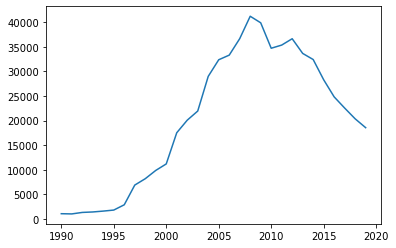

In [98]:
# Equatorial Guinea
gdp_High = gdp_df.loc[gdp_df['Country'] == 'Equatorial Guinea']
plt.plot(gdp_High["Year"], gdp_High["GDP_Per_Capita"])

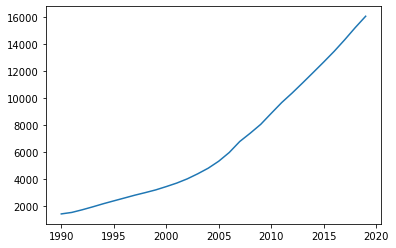

In [99]:
# China
gdp_High2 = gdp_df.loc[gdp_df['Country'] == 'China']

plt.plot(gdp_High2["Year"], gdp_High2["GDP_Per_Capita"])

In [101]:
# You may be on the wrong track here . . . leave the bonus alone for now.
weird_gdp = [gdp_High] + [gdp_High2]
# weirder_pivot = pd.pivot_table([weird_gdp], values='GDP_Per_Capita', index='Country', columns="Year")